In [114]:
#AH's code 

import csv
from matplotlib import pyplot as pl
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [115]:
#Saving the swap data
dataSwap1 = pd.read_csv("./data/jpsi_mu_pi_swap.csv")
dataSwap1.loc[:, "target"] = 1
dataSwap2 = pd.read_csv("./data/jpsi_mu_k_swap.csv")
dataSwap2.loc[:, "target"] = 1
dataSwap3 = pd.read_csv("./data/k_pi_swap.csv")
dataSwap3.loc[:, "target"] = 1

#Saving the signal data
dataSignal = pd.read_csv("./data/signal.csv")
dataSignal.loc[:, "target"] = 0

#Combining the files
data = dataSwap1.append(dataSignal, ignore_index=True)
data = data.append(dataSwap2, ignore_index=True)
data = data.append(dataSwap3, ignore_index=True)

dataSwap1 = dataSwap1.append(dataSignal, ignore_index=True)
dataSwap2 = dataSwap2.append(dataSignal, ignore_index=True)
dataSwap3 = dataSwap3.append(dataSignal, ignore_index=True)

dataSwap1 = dataSwap1.sample(frac=1)
dataSwap2 = dataSwap2.sample(frac=1)
dataSwap3 = dataSwap3.sample(frac=1)

#Removing the columns with a corelation to the result
X1 = dataSwap1.iloc[:, 2:98] #Data 
y1 = dataSwap1.iloc[:, 100] #Targe

X2 = dataSwap2.iloc[:, 2:98] #Data 
y2 = dataSwap2.iloc[:, 100] #Targe

X3 = dataSwap3.iloc[:, 2:100] #Data 
y3 = dataSwap3.iloc[:, 101] #Targe

In [116]:
print(y3)

150675    0
195310    0
291240    0
161028    0
43581     1
         ..
163096    0
184383    0
212984    0
165639    0
51836     1
Name: target, Length: 300000, dtype: int64


In [117]:
#Doing the machine learning using xgboost and binary logistic
seed = 42
test_size = 0.2

#Creating the three different data sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=test_size, random_state=seed, stratify = y1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=test_size, random_state=seed, stratify = y2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=test_size, random_state=seed, stratify = y3)

#ML process
model1 = xgb.XGBClassifier(objective="binary:logistic", missing=np.nan, seed=42)
model2 = xgb.XGBClassifier(objective="binary:logistic", missing=np.nan, seed=42)
model3 = xgb.XGBClassifier(objective="binary:logistic", missing=np.nan, seed=42)

model1.fit(X_train1,y_train1,verbose=True,early_stopping_rounds=10,eval_metric="logloss",eval_set=[(X_test1, y_test1)])
model2.fit(X_train2,y_train2,verbose=True,early_stopping_rounds=10,eval_metric="logloss",eval_set=[(X_test2, y_test2)])
model3.fit(X_train3,y_train3,verbose=True,early_stopping_rounds=10,eval_metric="logloss",eval_set=[(X_test3, y_test3)])

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.43915
[1]	validation_0-logloss:0.29881
[2]	validation_0-logloss:0.21038
[3]	validation_0-logloss:0.15113
[4]	validation_0-logloss:0.11020
[5]	validation_0-logloss:0.08125
[6]	validation_0-logloss:0.06056
[7]	validation_0-logloss:0.04557
[8]	validation_0-logloss:0.03463
[9]	validation_0-logloss:0.02669
[10]	validation_0-logloss:0.02086
[11]	validation_0-logloss:0.01656
[12]	validation_0-logloss:0.01328
[13]	validation_0-logloss:0.01082
[14]	validation_0-logloss:0.00908
[15]	validation_0-logloss:0.00772
[16]	validation_0-logloss:0.00677
[17]	validation_0-logloss:0.00606
[18]	validation_0-logloss:0.00551
[19]	validation_0-logloss:0.00509
[20]	validation_0-logloss:0.00473
[21]	validation_0-logloss:0.00450
[22]	validation_0-logloss:0.00432
[23]	validation_0-logloss:0.00421
[24]	validation_0-logloss:0.00411
[25]	validation_0-logloss:0.00407
[26]	validation_0-logloss:0.00402
[27]	validation_0-logloss:0.00399
[28]	validation_0-logloss:0.00396
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

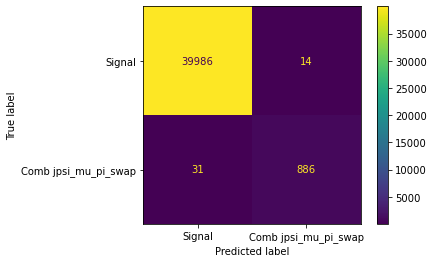

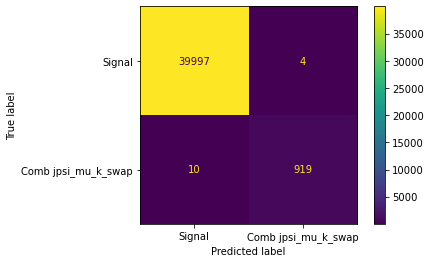

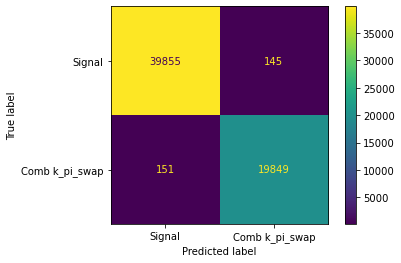

In [118]:
plot_confusion_matrix(model1, X_test1, y_test1, values_format="d", display_labels=["Signal", "Comb jpsi_mu_pi_swap"])
plot_confusion_matrix(model2, X_test2, y_test2, values_format="d", display_labels=["Signal", "Comb jpsi_mu_k_swap"])
plot_confusion_matrix(model3, X_test3, y_test3, values_format="d", display_labels=["Signal", "Comb k_pi_swap"])

In [125]:
#Prediction for the first model
y_pred1 = model1.predict(data.iloc[:, 2:98])

#Selecting the masses using the model
mass = []
for i in range(len(y_pred1)):
    if y_pred1[i] == 1:
        mass.append(data["B0_M"][i])
        
#Prediction for the second model
y_pred2 = model2.predict(data.iloc[:, 2:98])

#Selecting the masses using the model
mass = []
for i in range(len(y_pred2)):
    if y_pred2[i] == 1:
        mass.append(data["B0_M"][i])

#Prediction for the third model
y_pred3 = model3.predict(data.iloc[:, 2:100])

#Selecting the masses using the model
mass = []
for i in range(len(y_pred3)):
    if y_pred3[i] == 1:
        mass.append(data["B0_M"][i])

100
101


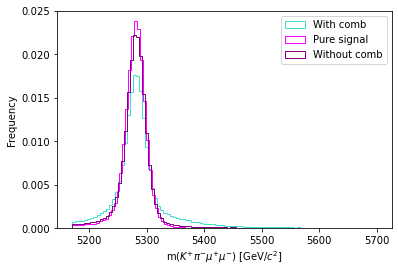

In [138]:
#All the masses
x, y=np.histogram(data["B0_M"], bins=100, density = True)

#Signal mass comparison
x1, y1 = np.histogram(dataSignal["B0_M"], bins=100, density = True)

#Plotting the histogram of mass
freq, edges = np.histogram(mass, bins=100, density = True)

centres = (edges[:-1] + edges[1:])/2.
#pl.errorbar(centres, freq, yerr=np.sqrt(freq), ls = 'none', elinewidth=1)

centres = (y[:-1] + y[1:])/2.
pl.hist(data["B0_M"], color="white", ec="turquoise", bins=100, label="With comb", histtype='step', density = True)

centres = (y1[:-1] + y1[1:])/2.
hist, bins, idk = pl.hist(dataSignal["B0_M"], color="white", ec="magenta", bins=100, label="Pure signal", histtype='step', density = True)
pl.hist(mass, color="white", ec="purple", bins=100, label="Without comb", histtype='step', density = True)

#dataSignal["B0_M"] = dataSignal["B0_M"].to_numpy

print(len(centres))
print(len(edges))
pl.xlabel(r'm($K^{+}\pi^{-}\mu^{+}\mu^{-}$) [GeV/$c^{2}$]')
pl.ylabel('Frequency')
#sns.kdeplot(dataSignal["B0_M"], color = 'green', bw = 0.1)
#sns.kdeplot(data["B0_M"], color = 'red', bw = 0.1)
#sns.kdeplot(energy_list, bw = float(bwc))
pl.legend()
pl.show()

In [144]:
#making separate dataset which trains on all the swap files at once - beginning of TS code

#Saving the swap data
dataSwap1 = pd.read_csv("./data/jpsi_mu_pi_swap.csv")
dataSwap1.loc[:, "target"] = 1
dataSwap2 = pd.read_csv("./data/jpsi_mu_k_swap.csv")
dataSwap2.loc[:, "target"] = 1
dataSwap3 = pd.read_csv("./data/k_pi_swap.csv")
dataSwap3.loc[:, "target"] = 1

#Saving the signal data
dataSignal = pd.read_csv("./data/signal.csv")
dataSignal.loc[:, "target"] = 0

#Combining the files
data = dataSwap1.append(dataSignal, ignore_index=True)
data = data.append(dataSwap2, ignore_index=True)
data = data.append(dataSwap3, ignore_index=True)

dataSwap1 = dataSwap1.append(dataSignal, ignore_index=True)
dataSwap2 = dataSwap2.append(dataSignal, ignore_index=True)
dataSwap3 = dataSwap3.append(dataSignal, ignore_index=True)

dataSwap1 = dataSwap1.sample(frac=1)
dataSwap2 = dataSwap2.sample(frac=1)
dataSwap3 = dataSwap3.sample(frac=1)

#Removing the columns with a corelation to the result
X1 = dataSwap1.iloc[:, 2:98] #Data 
y1 = dataSwap1.iloc[:, 100] #Targe

X2 = dataSwap2.iloc[:, 2:98] #Data 
y2 = dataSwap2.iloc[:, 100] #Targe

X3 = dataSwap3.iloc[:, 2:100] #Data 
y3 = dataSwap3.iloc[:, 101] #Targe

#combining remaining columns for total training set
XT = X1.append(X2, ignore_index=True)
XT = XT.append(X2, ignore_index=True)
yT = y1.append(y2, ignore_index=True)
yT = yT.append(y2, ignore_index=True)

print(XT.head())

   mu_plus_ProbNNk  mu_plus_ProbNNpi  mu_plus_ProbNNmu  mu_plus_ProbNNe  \
0         0.001944          0.015589          0.995556         0.000004   
1         0.000745          0.001472          0.999549         0.000064   
2         0.000261          0.018191          0.952357         0.000017   
3         0.000216          0.025044          0.998964         0.000004   
4         0.000050          0.004909          0.978605         0.000002   

   mu_plus_ProbNNp  mu_plus_P    mu_plus_PT  mu_plus_ETA  mu_plus_PHI  \
0     2.742860e-06   43788.30   3210.990482     3.304587    -1.306213   
1     1.288878e-07   49720.44  10378.448756     2.248757    -2.152820   
2     5.978055e-06   13592.56    764.233844     3.570760     2.111663   
3     5.679159e-06   40268.11   3507.462622     3.131912     1.335982   
4     7.892467e-07   32221.27   2017.780256     3.462794     0.350649   

     mu_plus_PE  ...  B0_OWNPV_Y  B0_OWNPV_Z  B0_FD_OWNPV  B0_ID  \
0  43788.427473  ...     -0.1869    127.84

In [145]:
#Doing the machine learning using xgboost and binary logistic
seed = 42
test_size = 0.2

#Creating the three different data sets
X_trainT, X_testT, y_trainT, y_testT = train_test_split(XT, yT, test_size=test_size, random_state=seed, stratify = yT)

#ML process
modelT = xgb.XGBClassifier(objective="binary:logistic", missing=np.nan, seed=42)

modelT.fit(X_trainT,y_trainT,verbose=True,early_stopping_rounds=10,eval_metric="logloss",eval_set=[(X_testT, y_testT)])


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.43950
[1]	validation_0-logloss:0.29914
[2]	validation_0-logloss:0.21058
[3]	validation_0-logloss:0.15131
[4]	validation_0-logloss:0.11025
[5]	validation_0-logloss:0.08089
[6]	validation_0-logloss:0.05997
[7]	validation_0-logloss:0.04480
[8]	validation_0-logloss:0.03372
[9]	validation_0-logloss:0.02558
[10]	validation_0-logloss:0.01955
[11]	validation_0-logloss:0.01511
[12]	validation_0-logloss:0.01181
[13]	validation_0-logloss:0.00936
[14]	validation_0-logloss:0.00753
[15]	validation_0-logloss:0.00612
[16]	validation_0-logloss:0.00507
[17]	validation_0-logloss:0.00425
[18]	validation_0-logloss:0.00365
[19]	validation_0-logloss:0.00317
[20]	validation_0-logloss:0.00277
[21]	validation_0-logloss:0.00247
[22]	validation_0-logloss:0.00223
[23]	validation_0-logloss:0.00205
[24]	validation_0-logloss:0.00191
[25]	validation_0-logloss:0.00181
[26]	validation_0-logloss:0.00169
[27]	validation_0-logloss:0.00160
[28]	validation_0-logloss:0.00151
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

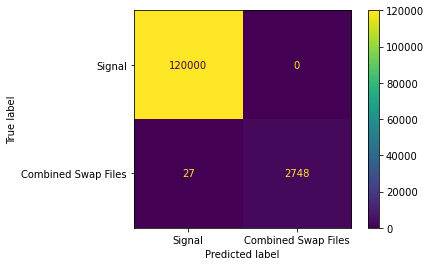

In [146]:
plot_confusion_matrix(modelT, X_testT, y_testT, values_format="d", display_labels=["Signal", "Combined Swap Files"])

In [158]:
#Prediction for the first model
y_predT = modelT.predict(dataT.iloc[:, 2:98])

#Selecting the masses using the model
massT = []
for i in range(len(y_predT)):
    if y_predT[i] == 1:
        massT.append(dataT["B0_M"][i])
        

100
101


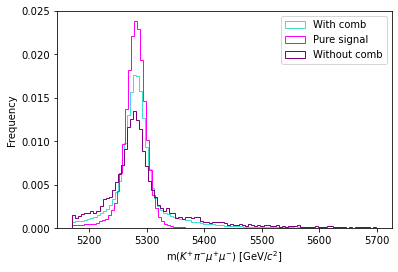

In [148]:
#All the masses
x0, y0=np.histogram(dataT["B0_M"], bins=100, density = True)

#Signal mass comparison
x1, y1 = np.histogram(dataSignal["B0_M"], bins=100, density = True)

#Plotting the histogram of mass
freqT, edgesT = np.histogram(massT, bins=100, density = True)

centresT = (edgesT[:-1] + edgesT[1:])/2.
#pl.errorbar(centres, freq, yerr=np.sqrt(freq), ls = 'none', elinewidth=1)

centresT = (y0[:-1] + y0[1:])/2.
pl.hist(dataT["B0_M"], color="white", ec="turquoise", bins=100, label="With comb", histtype='step', density = True)

centresT = (y1[:-1] + y1[1:])/2.
hist, bins, idk = pl.hist(dataSignal["B0_M"], color="white", ec="magenta", bins=100, label="Pure signal", histtype='step', density = True)
pl.hist(massT, color="white", ec="purple", bins=100, label="Without comb", histtype='step', density = True)

#dataSignal["B0_M"] = dataSignal["B0_M"].to_numpy

pl.xlabel(r'm($K^{+}\pi^{-}\mu^{+}\mu^{-}$) [GeV/$c^{2}$]')
pl.ylabel('Frequency')
#sns.kdeplot(dataSignal["B0_M"], color = 'green', bw = 0.1)
#sns.kdeplot(data["B0_M"], color = 'red', bw = 0.1)
#sns.kdeplot(energy_list, bw = float(bwc))
pl.legend()
pl.show()

In [1]:

#All the masses
x, y=np.histogram(data["B0_M"], bins=100, density = True)

#Signal mass comparison
x1, y1 = np.histogram(dataSignal["B0_M"], bins=100, density = True)

hist, bins, idk = pl.hist(dataSignal["B0_M"], color="white", ec="magenta", bins=100, label="Pure signal", histtype='step', density = True)
pl.hist(data["B0_M"], color="white", ec="turquoise", bins=100, label="With comb", histtype='step', density = True)

#datasets trained together
pl.hist(massT, color="white", ec="skyblue", bins=100, label="Without comb - together", histtype='step', density = True)

#dataset trained separately
pl.hist(mass, color="white", ec="purple", bins=100, label="Without comb - separate", histtype='step', density = True)

pl.xlabel(r'm($K^{+}\pi^{-}\mu^{+}\mu^{-}$) [GeV/$c^{2}$]')
pl.ylabel('Frequency')
sns.kdeplot(dataSignal["B0_M"], color = 'green', bw = 0.1)
sns.kdeplot(data["B0_M"], color = 'red', bw = 0.1)
pl.legend()
pl.show()

NameError: name 'np' is not defined